In [1]:
import ast
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt

feature_names = ["landscape", "forest", "building", "road", "vehicle", "bridge", "river", "lake",
                 "farmland", "airport", "runway", "ship", "railway", "parking lot", "cloud", "wind turbine",
                 "stadium", "school", "hospital", "industrial site", "park", "beach", "mountain", "glacier",
                 "desert", "volcano", "crater", "island", "wetland", "quarry", "dam", "residential area"]

In [6]:
df = pd.read_csv('train_LEVIR-CD_Dataset_Differences.csv')
labels = np.array(df['change'])

differences_matrix = df['differences'].apply(ast.literal_eval).tolist()
differences_matrix = np.array(differences_matrix)

df2 = pd.read_csv('test_LEVIR-CD_Dataset_Differences.csv')
labels2 = np.array(df2['change'])

differences_matrix2 = df2['differences'].apply(ast.literal_eval).tolist()
differences_matrix2 = np.array(differences_matrix2)

Simple Classification

In [11]:
# All classes were summed
differences_matrix_sum = np.sum(differences_matrix, axis=1)
T_list = np.linspace(0, 1, 10000)

f1_list = []
recall_list = []
precision_list = []
accuracy_list = []
for T in T_list:
    predicted = (differences_matrix_sum[:] > T).astype(int)
    
    f1 = f1_score(labels[:], predicted)
    f1_list.append(f1)

    recall = recall_score(labels[:], predicted)
    recall_list.append(recall)

    precision = precision_score(labels[:], predicted)
    precision_list.append(precision)

    accuracy = accuracy_score(labels[:], predicted)
    accuracy_list.append(accuracy)

idx1 = np.argmax(f1_list)
idx2 = np.argmax(recall_list)
idx3 = np.argmax(precision_list)
idx4 = np.argmax(accuracy_list)

print("Training Results:")
print("Optimal T={} based on F1 statistic: {}".format(T_list[idx1], f1_list[idx1]))
print("Optimal T={} based on Recall statistic: {}".format(T_list[idx2], recall_list[idx2]))
print("Optimal T={} based on Precision statistic: {}".format(T_list[idx3], precision_list[idx3]))
print("Optimal T={} based on Accuracy statistic: {}".format(T_list[idx4], accuracy_list[idx4]))
print("\n")

predicted_f1 = (differences_matrix2[:] > T_list[idx1]).astype(int)
predicted_recall = (differences_matrix2[:] > T_list[idx2]).astype(int)
predicted_precision = (differences_matrix2[:] > T_list[idx3]).astype(int)
predicted_accuracy = (differences_matrix2[:] > T_list[idx4]).astype(int)
print(predicted_f1)
print(labels2[:])
f1 = f1_score(labels2[:], predicted_f1)
recall = recall_score(labels2[:], predicted_recall)
precision = precision_score(labels2[:], predicted_precision)
accuracy = accuracy_score(labels2[:], predicted_accuracy)

print("Test Results")
print("F1 statistic: {}".format(f1))
print("Recall statistic: {}".format(recall))
print("Precision statistic: {}".format(precision))
print("Accuracy statistic: {}".format(accuracy))

In [4]:
np.mean(labels)

0.5203030303030303

In [38]:
df['y'] = differences_matrix_sum

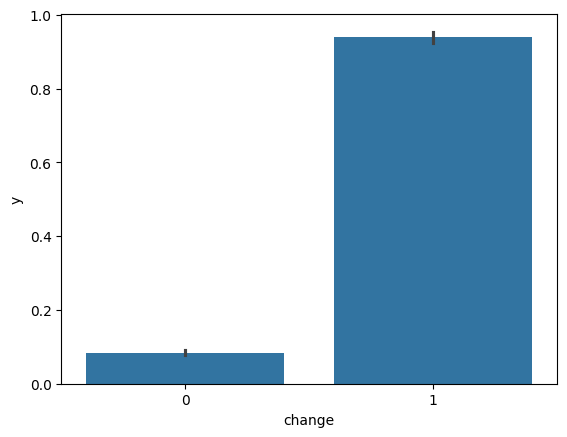

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'change', y = 'y', data = df)
plt.show()

Machine Learning Classification

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(differences_matrix, labels, test_size=0.3)

Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print('\n')
# For test set
y_pred2 = dt.predict(differences_matrix2)

print("F1 Score: ", f1_score(labels2, y_pred2))
print("Recall Score: ", recall_score(labels2, y_pred2))
print("Precision: ", precision_score(labels2, y_pred2))
print("Accuracy: ", accuracy_score(labels2, y_pred2))


F1 Score:  0.9568589432864761
Recall Score:  0.9527027027027027
Precision:  0.9610516066212269
Accuracy:  0.955050505050505


F1 Score:  0.9541864139020538
Recall Score:  0.934984520123839
Precision:  0.9741935483870968
Accuracy:  0.9147058823529411


RF

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print('\n')
# For test set
y_pred2 = rf.predict(differences_matrix2)

print("F1 Score: ", f1_score(labels2, y_pred2))
print("Recall Score: ", recall_score(labels2, y_pred2))
print("Precision: ", precision_score(labels2, y_pred2))
print("Accuracy: ", accuracy_score(labels2, y_pred2))

F1 Score:  0.9786830885836095
Recall Score:  0.997104247104247
Precision:  0.9609302325581396
Accuracy:  0.9772727272727273


F1 Score:  0.9787234042553192
Recall Score:  0.9969040247678018
Precision:  0.9611940298507463
Accuracy:  0.9588235294117647


Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb = gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print('\n')
# For test set
y_pred2 = gb.predict(differences_matrix2)

print("F1 Score: ", f1_score(labels2, y_pred2))
print("Recall Score: ", recall_score(labels2, y_pred2))
print("Precision: ", precision_score(labels2, y_pred2))
print("Accuracy: ", accuracy_score(labels2, y_pred2))

F1 Score:  0.9770992366412213
Recall Score:  0.9884169884169884
Precision:  0.9660377358490566
Accuracy:  0.9757575757575757


F1 Score:  0.9755351681957186
Recall Score:  0.9876160990712074
Precision:  0.9637462235649547
Accuracy:  0.9529411764705882


XGBoost

In [44]:
import xgboost as xgb

XGB = xgb.XGBClassifier()
XGB = XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)

print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print('\n')
# For test set
y_pred2 = XGB.predict(differences_matrix2)

print("F1 Score: ", f1_score(labels2, y_pred2))
print("Recall Score: ", recall_score(labels2, y_pred2))
print("Precision: ", precision_score(labels2, y_pred2))
print("Accuracy: ", accuracy_score(labels2, y_pred2))

F1 Score:  0.9828734538534729
Recall Score:  0.997104247104247
Precision:  0.9690431519699813
Accuracy:  0.9818181818181818


F1 Score:  0.9785932721712539
Recall Score:  0.9907120743034056
Precision:  0.9667673716012085
Accuracy:  0.9588235294117647


In [45]:
feature_importances = dt.feature_importances_

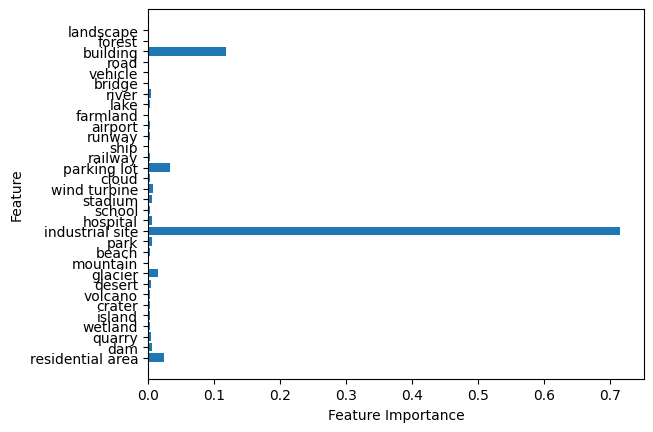

In [46]:
# plt.figure(figsize=(12, 10))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # En önemli özelliği üstte göstermek için
plt.show()